# <span style="font-family: Arial; color: blue;">Module-07 (Task 4)</span>



* Author : [Prabha Sapkota](https://github.com/prabhasapkota)
* Date : 10-03-2023
* [GitHub Repository](https://github.com/prabhasapkota/datafun-07-ml-predictive)

## Part 1 : Linear Regression

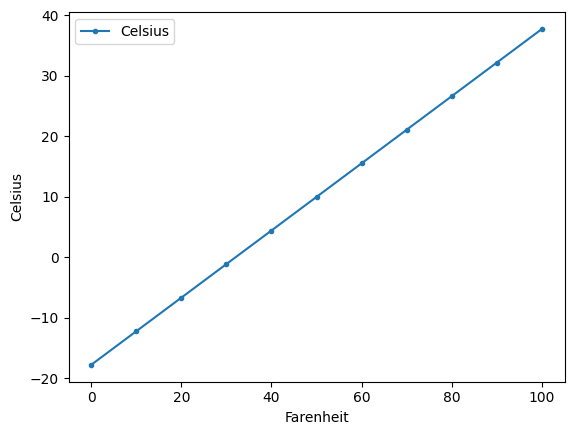

In [3]:
import pandas as pd

c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=["Farenheit", "Celsius"])
axes = temps_df.plot(x = "Farenheit", y= "Celsius", style= ".-")
y_label = axes.set_ylabel("Celsius")

## Section 1 : Load

In [4]:
nyc = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")

# Section 2 : View

In [5]:
nyc.head(), nyc.tail()

(     Date  Value  Anomaly
 0  189501   34.2     -3.2
 1  189601   34.7     -2.7
 2  189701   35.5     -1.9
 3  189801   39.6      2.2
 4  189901   36.4     -1.0,
        Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3)

# Section 3 : Clean

In [6]:
nyc.columns = ["Date", "Temperature", "Anomaly"]
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Section 4 : Describe

In [7]:
pd.set_option("display.precision", 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 : Calculate

In [9]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

linear_regression.slope, linear_regression.intercept


(0.014771361132966163, 8.694993233674289)

## Section 6 : Predict

In [10]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Section 7 : Plot

(10.0, 70.0)

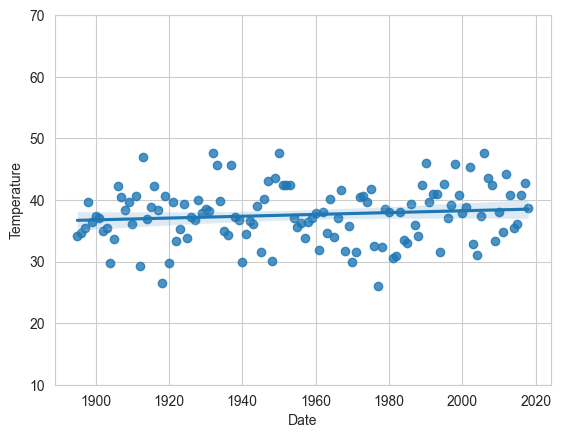

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 2 : Machine Learning

## Initial Setup 

In [8]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')  

nyc.columns= ['Date','Temperature', 'Anomaly'] 

nyc.Date = nyc.Date.floordiv(100) 

nyc.head(3) 

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##  Section 1 : Split Data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

X_train.shape, X_test.shape

((93, 1), (31, 1))

## Section 2 : Training

In [10]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

linear_regression.coef_, linear_regression.intercept_

(array([0.01939167]), -0.30779820252658396)

## Section 2 : Testing

In [12]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected:{e:.2f}')

predicted: 37.86, expected:31.70
predicted: 38.69, expected:34.80
predicted: 37.00, expected:39.40
predicted: 37.25, expected:45.70
predicted: 38.05, expected:32.30
predicted: 37.64, expected:33.80
predicted: 36.94, expected:39.70


## Section 3 : Predict

In [13]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2030)

array([39.05729859])

## Section 4 : Plot

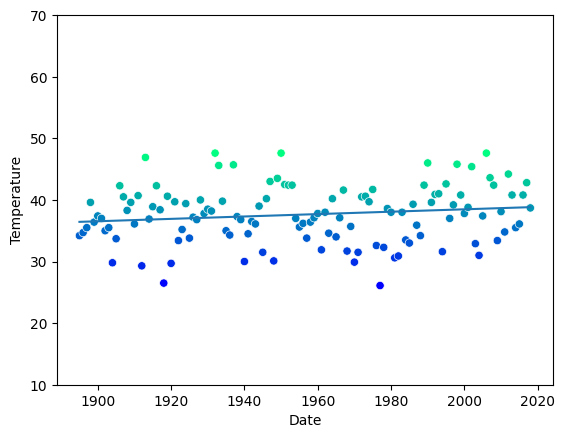

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x,y)


## Remarks

* I found the first method was relatively easier to execute and understand than Machine learning one. Having said that, I guess Machine Learning will be easier aftyer I go in depth with Machine Learning courses.

# Part 3 : Bonus

## Section 1 : Load

In [1]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

## Section 2 : Describe Dataset

In [2]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Section 3 : Exploring with Pandas Datasets

In [7]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

pd.set_option('display.precision', 4)

pd.set_option('display.width', None)

california_df = pd.DataFrame(california.data, columns= california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


## Section 4 : Describe

In [8]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


## Section 5 : Visualizing

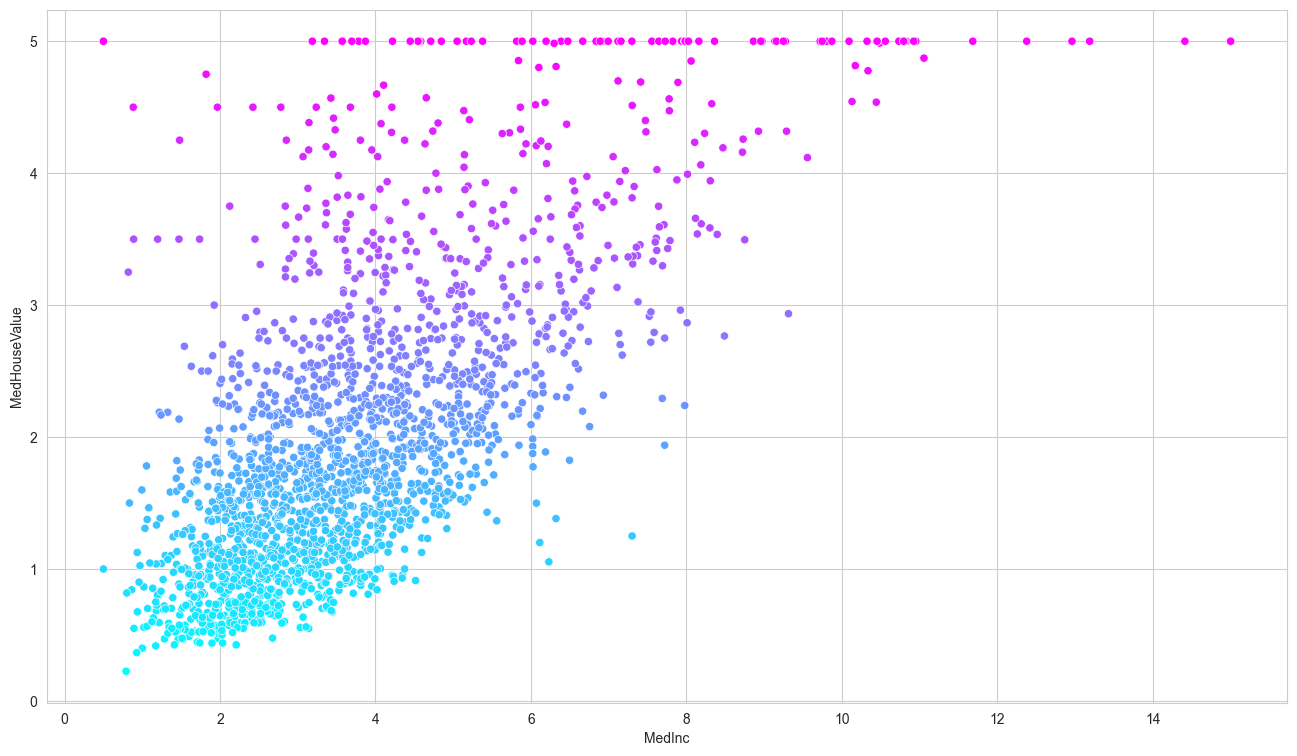

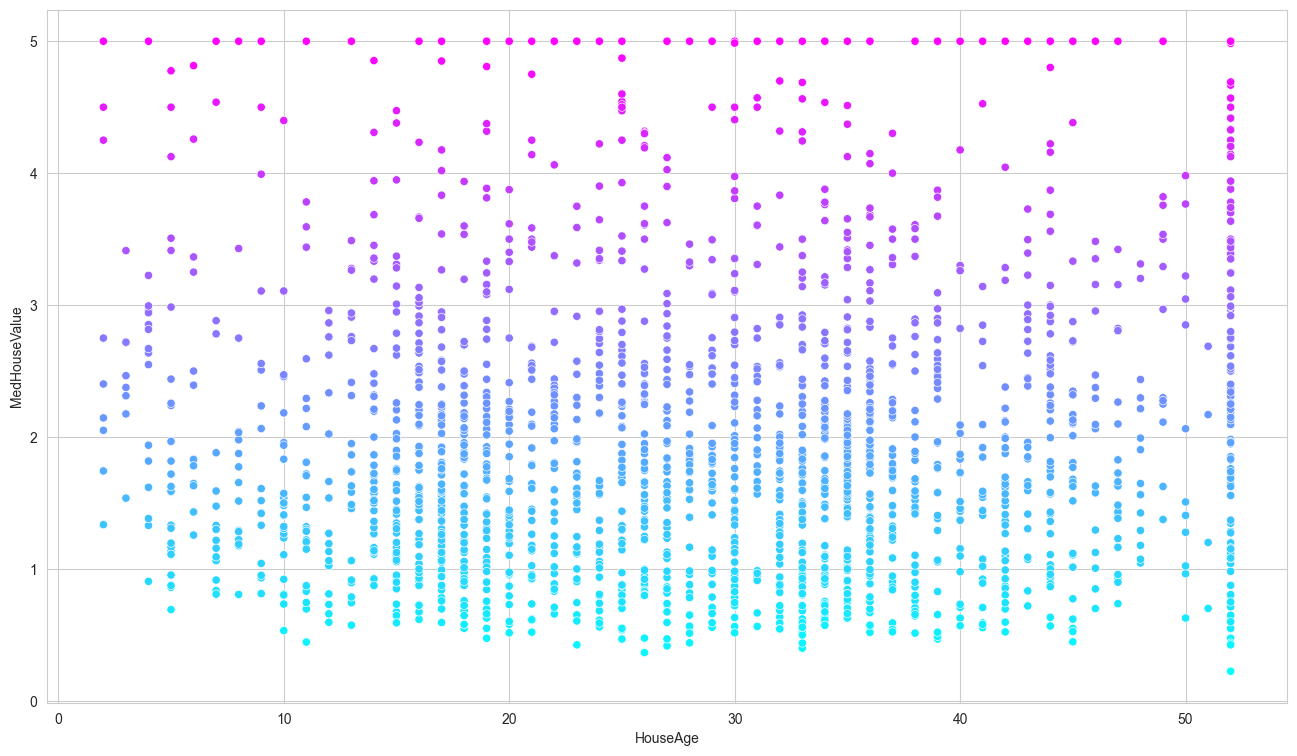

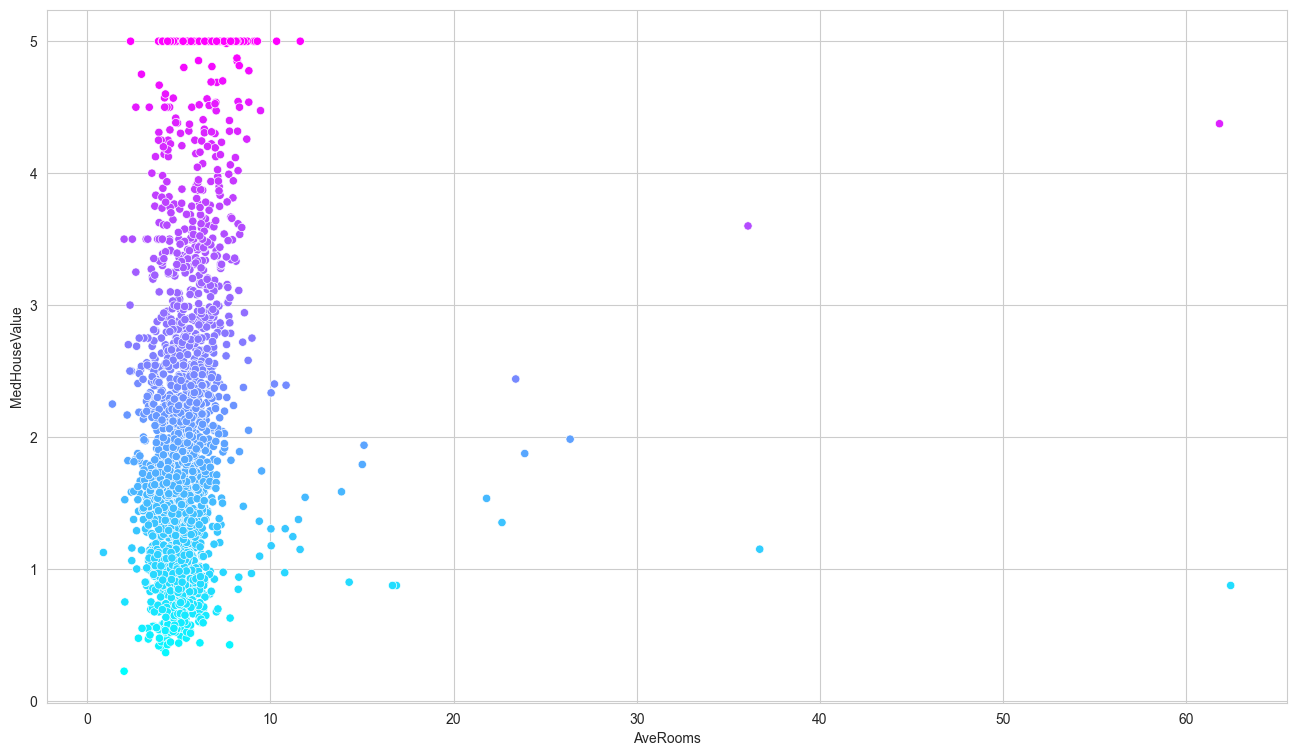

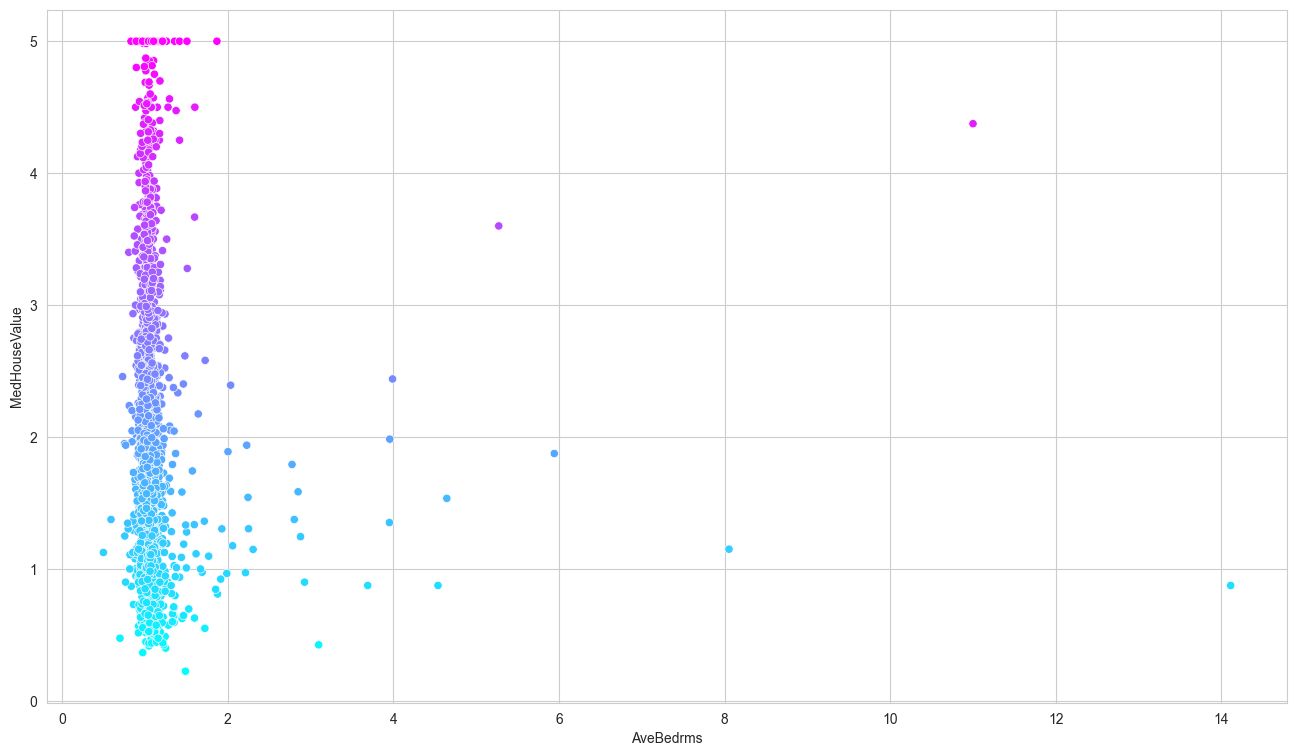

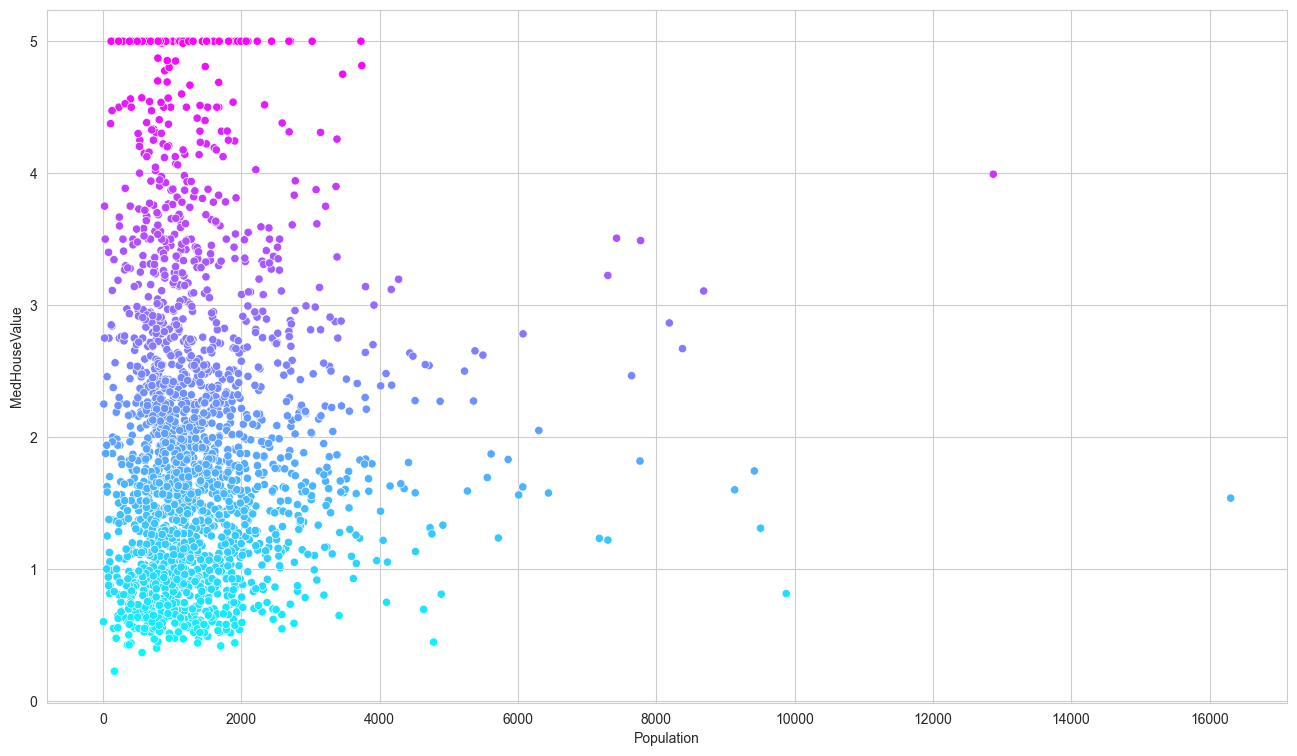

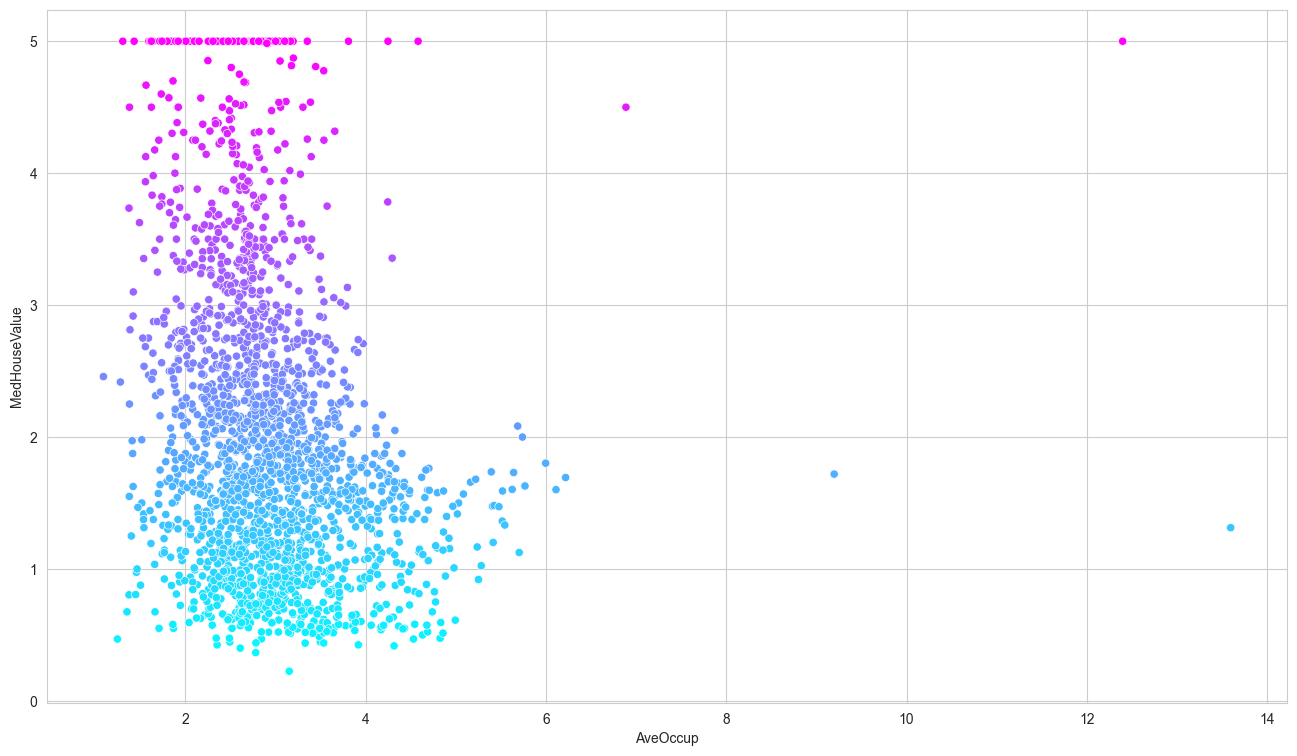

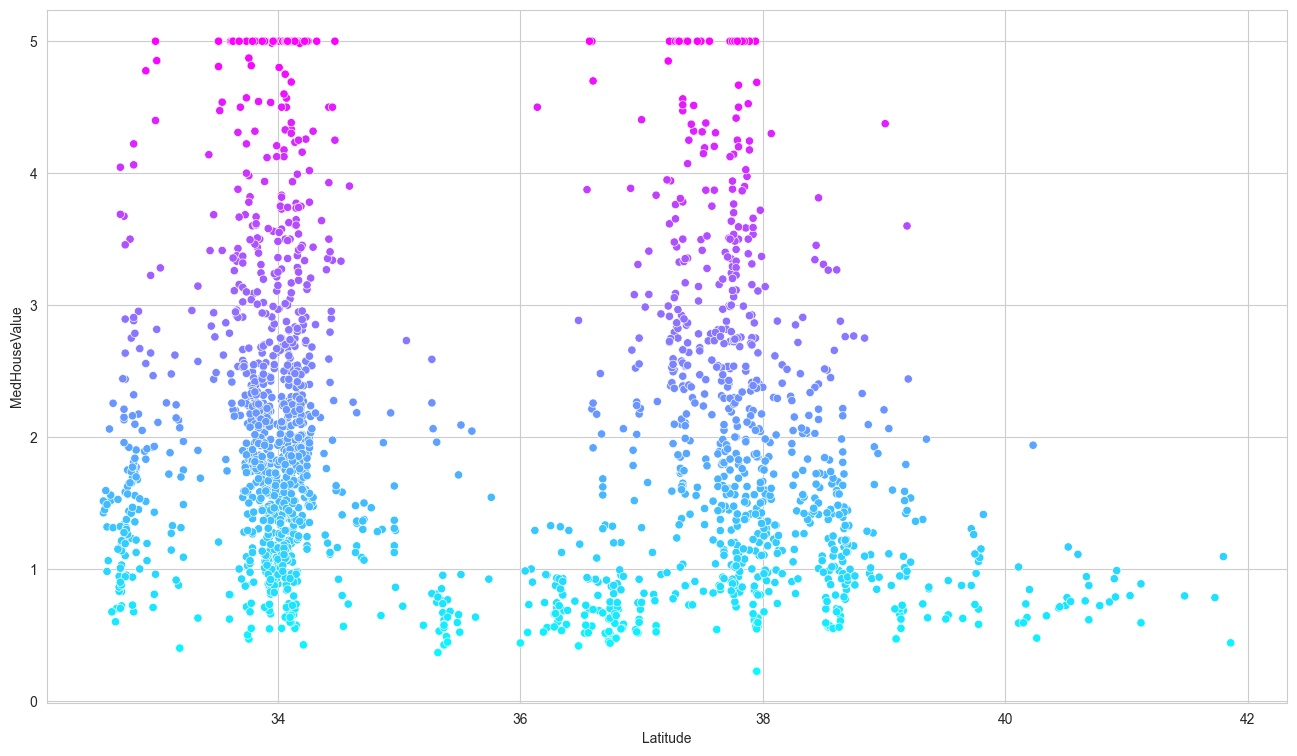

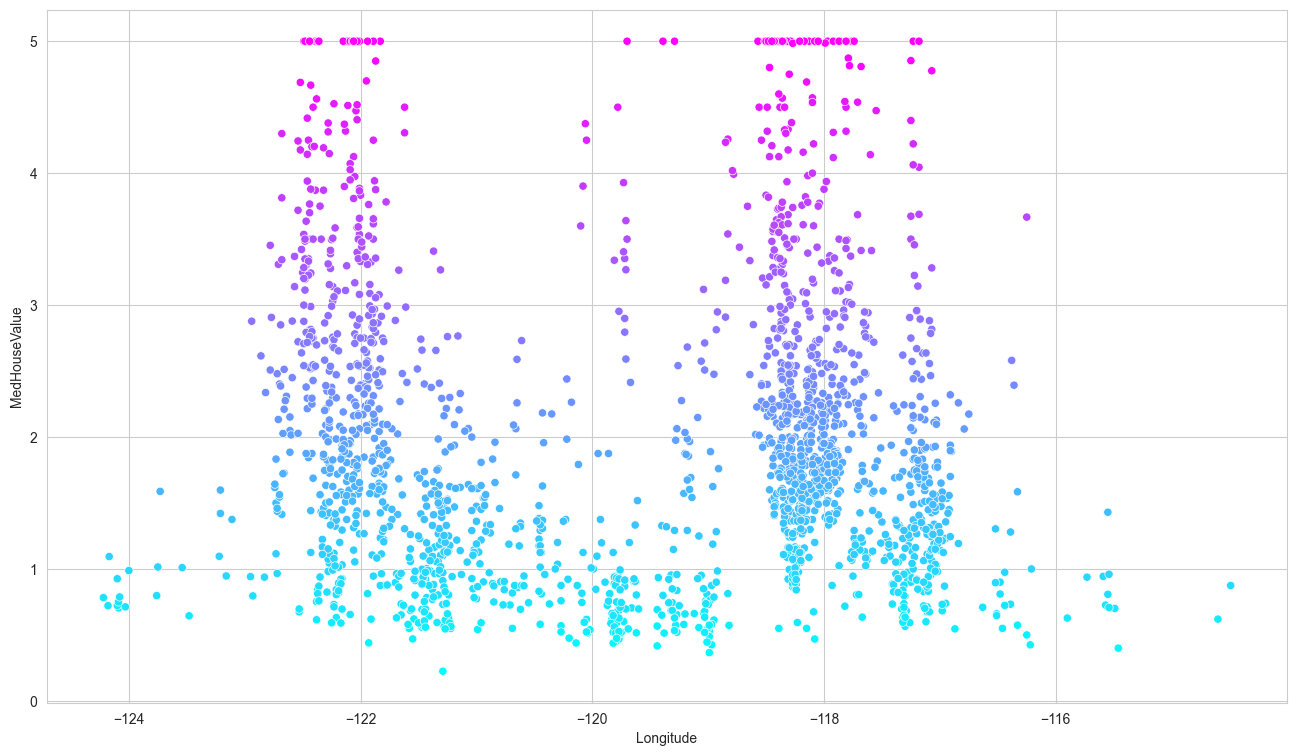

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns= california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
sample_df = california_df.sample(frac= 0.1, random_state=17)

sns.set_style("whitegrid")
for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)

## Section 6 : Split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train2, X_test2, y_train2, y_test2 = train_test_split(california.data, california.target, random_state=11)

X_train2.shape, X_test2.shape

((15480, 8), (5160, 8))

## Section 7 : Train

In [5]:
from sklearn.linear_model import LinearRegression

linear_regression2 = LinearRegression()

linear_regression2.fit(X=X_train2, y=y_train2)
predicted = linear_regression2.predict(X_test2)
expected = y_test2

predicted[:5], expected[:5]

(array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339]),
 array([0.762, 1.732, 1.125, 1.37 , 1.856]))

## Section 8 : Visualize Expected vs predicted prices

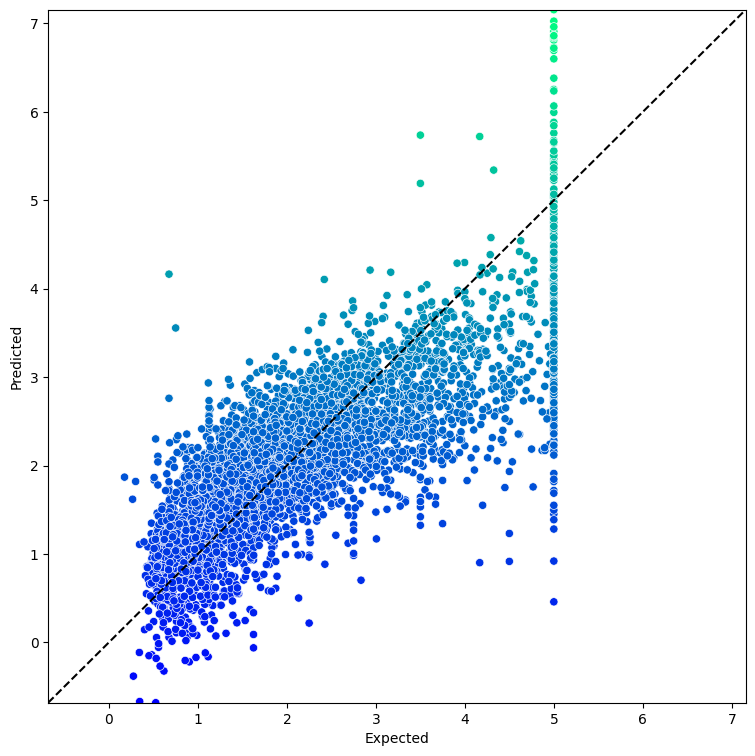

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()

df['Expected']= pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue= 'Predicted', palette= 'winter', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start,end)
axes.set_ylim(start,end)
line = plt.plot([start,end], [start,end], 'k--')


## Remarks for bonus task:

* Like people say "Practice makes a man perfect",  things got little easier to execute the bonus task after i did the alike task for the project. And i am excited to learn more about this. 